## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files|
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_df.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.

# Created dataframe of list of unique Mouse ID numbers
individuals = mouse_df["Mouse ID"].unique()
individuals_df = pd.DataFrame(individuals)
# Used count method to calculate total number of mice in study
individual_count = individuals_df.count()
individual_count


0    249
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Grouped data by Mouse ID and Timepoint
data_groupby_tp_id = mouse_df.groupby(["Mouse ID", "Timepoint"])
# Counted values in groupby object and put in dataframe
data_groupby_tp_id.count()
count_per_tp_df = pd.DataFrame(data_groupby_tp_id.count())
count_per_tp_df



Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   
...                          ...  ...         ...         ...   
z969     25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
         40                    1    1           1           1   
         45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1  
...                                ...               ...  
z969     25                          1                 1  
         30                          1                 1  
         35                          1                 1  
         40                          1                 1  
         45                          1                 1  

[1888 rows x 6 columns]

In [4]:
# Located rows where more than one entry per timepoint existed
dup_tp_data = count_per_tp_df.loc[count_per_tp_df["Sex"] > 1,:]
# Reset index in order to access Mouse ID values
indexed_dup_tp_data = dup_tp_data.reset_index()
# Captured ID of mouse with duplicate data
dup_mouse_id = indexed_dup_tp_data["Mouse ID"][0]
dup_mouse_id

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = mouse_df.loc[mouse_df["Mouse ID"] == dup_mouse_id, :]
dup_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_index_id_df = mouse_df.set_index(["Mouse ID"])
#mouse_index_id_df
clean_mouse_df = mouse_index_id_df.drop(index=dup_mouse_id)
clean_mouse_df = clean_mouse_df.reset_index()
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [56]:
# Checking the number of mice in the clean DataFrame.
individuals_id_clean = clean_mouse_df["Mouse ID"].unique()
individuals_clean_df = pd.DataFrame(individuals_id_clean)
individuals_clean = individuals_clean_df.count()
individuals_clean

0    248
dtype: int64

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#clean_mouse_df['Drug Regimen'].unique()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

clean_data_groupby_drug = clean_mouse_df.groupby(["Drug Regimen"])

regimens = clean_mouse_df["Drug Regimen"].unique()
tumor_vols = clean_data_groupby_drug["Tumor Volume (mm3)"]

#regimens_srs = pd.Series(regimens)
#tumor_vols_srs = pd.Series(tumor_vols)

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_vols = clean_data_groupby_drug["Tumor Volume (mm3)"].mean()
median_vols = clean_data_groupby_drug["Tumor Volume (mm3)"].median()
var_vols = clean_data_groupby_drug["Tumor Volume (mm3)"].var()
std_vols = clean_data_groupby_drug["Tumor Volume (mm3)"].std()
sem_vols = clean_data_groupby_drug["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

tumor_vol_summary_df = pd.DataFrame(
    {
        "Drug Regimen": regimens,
        "Mean Tumor Volume (mm3)": mean_vols,
        "Median Tumor Volume (mm3)": median_vols,
        "Tumor Volume Variance": var_vols,
        "Tumor Volume Std. Dev.": std_vols,
        "Tumor Volume Std. Error": sem_vols
    }
)

# Reset index by dropping current index, and set index to Drug Regimen
tumor_vol_summary_df = tumor_vol_summary_df.reset_index(drop=True)
tumor_vol_summary_df = tumor_vol_summary_df.set_index(["Drug Regimen"]).round(2)


In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol_summary_df



,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Ramicane,40.68,41.56,24.95,4.99,0.33
Capomulin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,55.24,53.70,68.55,8.28,0.60
Ceftamin,54.33,52.51,66.17,8.13,0.60
Stelasyn,54.03,52.29,61.17,7.82,0.58
Zoniferol,52.32,50.45,43.85,6.62,0.54
Ketapril,40.22,40.67,23.49,4.85,0.32
Propriva,54.23,52.43,59.45,7.71,0.57


In [107]:
# Using the aggregation method, produce the same summary statistics in a single line
clean_data_groupby_drug["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']).round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [140]:
# Extracted tumor volume and regimen data from clean base dataframe

pd_bar_data = clean_mouse_df[["Drug Regimen","Tumor Volume (mm3)"]]

# Grouped measurements by regimen

pd_bar_groupby_reg = pd_bar_data.groupby("Drug Regimen")

# Assigned count of measurements in each regimen to variable

number_of_meas_by_reg = pd_bar_groupby_reg.count()
num_of_meas = number_of_meas_by_reg["Tumor Volume (mm3)"]

# Assembled dataframe for use in plotting bar graph

meas_by_reg_df = pd.DataFrame({"Regimen": regimens, "Number of Measurements": num_of_meas})
meas_by_reg_df = meas_by_reg_df.reset_index(drop=True)
meas_by_reg = meas_by_reg_df.set_index("Regimen")


meas_by_reg

,Number of Measurements
Regimen,
Ramicane,230
Capomulin,178
Infubinol,178
Placebo,188
Ceftamin,186
Stelasyn,181
Zoniferol,148
Ketapril,228
Propriva,181


(0.0, 275.0)

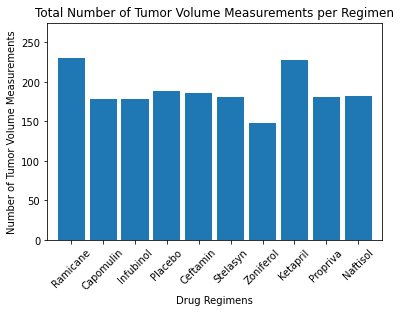

In [203]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

pd_bar = meas_by_reg.plot(kind="bar", title="Total Number of Tumor Volume Measurements per Regimen", width=.85, rot=45, legend=False)
pd_bar.set_xlabel("Drug Regimens")
pd_bar.set_ylabel("Number of Tumor Volume Measurements")
pd_bar.set_xlim(-.75, len(regimens)-.25)
pd_bar.set_ylim(0, 275)

(0.0, 275.0)

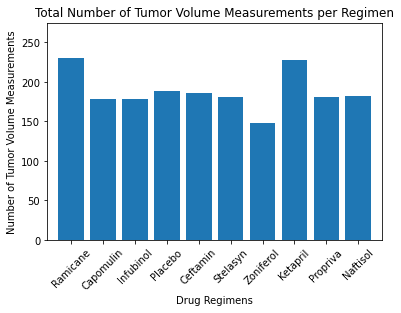

In [168]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimens, num_of_meas)

plt.title("Total Number of Tumor Volume Measurements per Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Tumor Volume Measurements")
plt.xticks(regimens, rotation="45")
plt.xlim(-.75, len(regimens)-.25)
plt.ylim(0, 275)

In [142]:
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


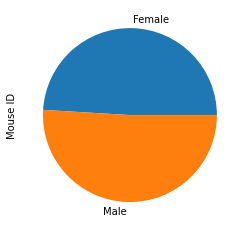

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_groupby_sex = clean_mouse_df.groupby("Sex")
mouse_sexes = mouse_groupby_sex["Mouse ID"].count()

mouse_sexes.plot(kind="pie")


([<matplotlib.patches.Wedge at 0x1478adf4fd0>,
 [Text(0.03308201408261561, 1.0995024239828841, ''),
  Text(-0.0330820140826155, -1.0995024239828841, '')])

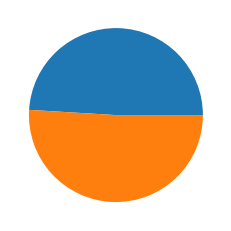

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_sexes)



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
